In [153]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import scipy

# from pymatgen.core.structure import Structure
# from pymatgen.core.composition import Composition

# from matminer.datasets import load_dataset
# from matminer.featurizers.composition.composite import ElementProperty
# from matminer.featurizers.composition.element import ElementFraction
# from matminer.featurizers.structure.rdf import RadialDistributionFunction
# from matminer.featurizers.structure.matrix import CoulombMatrix, SineCoulombMatrix


from scipy.stats import pearsonr, skew, kurtosis
from scipy.spatial import distance
from scipy.interpolate import CubicSpline
# from scipy.stats import skew, kurtosis

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# plt.style.use('../../modules/files/plot_style.mplstyle')

import warnings
warnings.filterwarnings('ignore')

Top 1 feature is cell ID with feature importance = 1
Top 2 feature is Mean_Q10-100 with feature importance = 12
Top 3 feature is Minimum_Q10-100 with feature importance = 13
Top 4 feature is Charge rate with feature importance = 10
Top 5 feature is Source with feature importance = 4
Top 6 feature is Anode with feature importance = 3
Top 7 feature is Discharge Rate with feature importance = 11
Top 8 feature is Temp with feature importance = 7
Top 9 feature is min soc with feature importance = 9
Top 10 feature is form factor with feature importance = 6


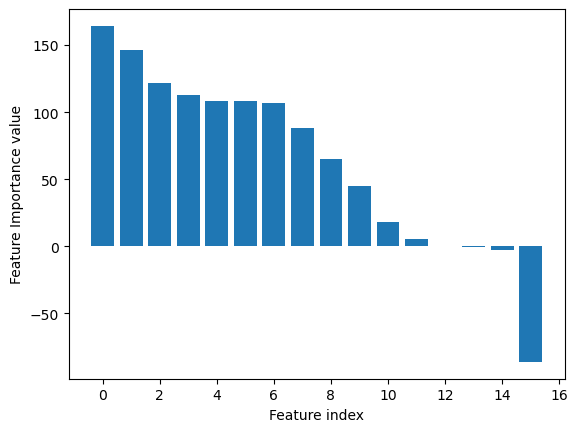

In [154]:
from sklearn.inspection import permutation_importance
model= SVR(kernel='rbf', C=1000)

X_train_subset, X_val, y_train_subset, y_val = train_test_split(X_train, y_train, test_size=0.2)
model.fit(X_train_subset,y_train_subset)

r = permutation_importance(model, X_val, y_val, n_repeats=2, random_state=0, scoring = 'neg_root_mean_squared_error')
sorted_r = r.importances_mean.argsort()[::-1]

top_ten_r = sorted_r[:10]
for i in range(len(top_ten_r)):
    print("Top",i+1,"feature is",df.columns[top_ten_r[i]],"with feature importance =",top_ten_r[i])
    
fig, ax = plt.subplots()
ax.bar(range(len(sorted_r)), r.importances_mean[sorted_r])
ax.set_xlabel("Feature index")
ax.set_ylabel("Feature Importance value")
plt.show()

In [155]:
my_current_directory = os.getcwd()
fdata = os.path.join(my_current_directory, 'X_matrix.csv')
df = pd.read_csv(fdata)

#print("The number of rows =", df.shape[0])
df_no_missing = df.dropna()
#print("The number of rows without NaNs =", df_no_missing.shape[0])

columns = list(df_no_missing)
#print(columns)

target = ['index_lifetime']
non_features = ['cell ID', 'Cahtode', 'Anode', 'Source', 'form factor','Charge Rate']

df['LFP?'] = np.where(df['Cahtode']=='LFP', 1, 0)
df['NCA?'] = np.where(df['Cahtode']=='NCA', 1, 0)
df['NMC?'] = np.where(df['Cahtode']=='NMC', 1, 0)
#print(df.head())

features = [f for f in columns if f not in targets if f not in non_features]
X_unscaled = df[features].values
y = df[target].values

X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X_unscaled) 

X_val_LFP = []
X_val_NCA = []
X_val_NMC = []
X_train = []
X_val = []
y_val_LFP = []
y_val_NCA = []
y_val_NMC = []
y_train = []
y_val = []

import random
list_LFP = [random.choice(range(0,26)) for i in range(5)]
list_NCA = [random.choice(range(27,50)) for i in range(5)]
list_NMC = [random.choice(range(51,78)) for i in range(5)]

for i in range(len(X_scaled)):
    if i in list_LFP:
        X_val_LFP.append(X_scaled[i])
        y_val_LFP.append(y[i])        
    elif i in list_NCA:
        X_val_NCA.append(X_scaled[i])
        y_val_NCA.append(y[i])
    elif i in list_NMC:
        X_val_NMC.append(X_scaled[i])
        y_val_NMC.append(y[i])
    else:
        X_train.append(X_scaled[i])
        y_train.append(y[i])

temp = np.concatenate((X_val_LFP, X_val_NCA), axis=0)
X_val = np.concatenate((temp, X_val_NMC), axis=0)
tempy = np.concatenate((y_val_LFP, y_val_NCA), axis=0)
y_val = np.concatenate((tempy, y_val_NMC), axis=0)

# X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2)
X_train = np.array(X_train) 
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ...........................C=1;, score=-2897.395 total time=   0.0s
[CV 2/3] END ...........................C=1;, score=-1297.863 total time=   0.0s
[CV 3/3] END ...........................C=1;, score=-2664.836 total time=   0.0s
[CV 1/3] END ..........................C=10;, score=-2883.795 total time=   0.0s
[CV 2/3] END ..........................C=10;, score=-1270.223 total time=   0.0s
[CV 3/3] END ..........................C=10;, score=-2656.988 total time=   0.0s
[CV 1/3] END .........................C=100;, score=-2876.307 total time=   0.0s
[CV 2/3] END ..........................C=100;, score=-812.023 total time=   0.0s
[CV 3/3] END .........................C=100;, score=-2589.191 total time=   0.0s
[CV 1/3] END ........................C=1000;, score=-2651.964 total time=   0.0s
[CV 2/3] END .........................C=1000;, score=-915.432 total time=   0.0s
[CV 3/3] END ........................C=1000;, sco

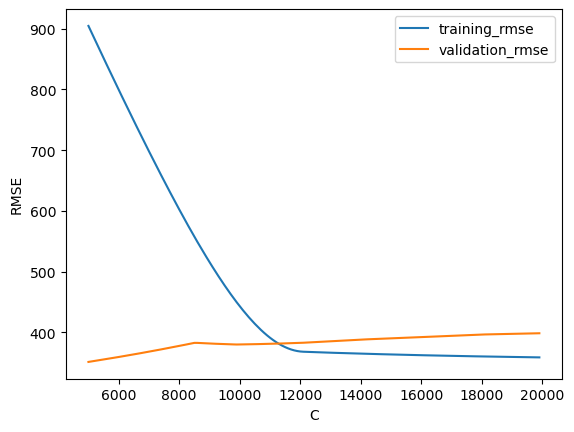

In [160]:
model = SVR(kernel= 'rbf')
param_grid = {'C' : [1,10,100,1000,10000]}
gs = GridSearchCV(model, param_grid, verbose=3, cv=3, scoring='neg_root_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)

def mySVR(C):
    svr = SVR(C=C)
    svr.fit(X_train, y_train)
    y_training_pred = svr.predict(X_train)
    y_validation_pred = svr.predict(X_val)
    training_rmse = np.sqrt(mean_squared_error(y_train, y_training_pred))
    validation_rmse = np.sqrt(mean_squared_error(y_val, y_validation_pred))
    return training_rmse, validation_rmse

c = np.arange(5000,20000,100)

training_rmse = []
validation_rmse = []
for i in c:
    t_rmse, v_rmse = mySVR(i)
    training_rmse.append(t_rmse)
    validation_rmse.append(v_rmse)

plt.plot(c, training_rmse, label="training_rmse")
plt.plot(c, validation_rmse, label="validation_rmse")
plt.xlabel("C")
plt.ylabel("RMSE")
plt.legend()
plt.show()

#df_no_missing.head(6)

In [161]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

def get_rmse(actual, pred):
    return np.mean([(actual[i]-pred[i])**2 for i in range(len(actual))])**0.5

def get_rmse_per(actual, pred):
    return np.mean([np.absolute((actual[i]-pred[i])/actual[i] * 100) for i in range(len(actual))])

def run_cv(n_folds, model, X_train, y_train, stratify=False):
    """
    Args:
        n_folds (int) : how many folds of CV to do
        model (sklearn Model) : what model do we want to fit
        X_train (np.array) : feature matrix
        y_train (np.array) : target array
        stratify (bool) : if True, use stratified CV, otherwise, use random CV
        
    Returns:
        a dictionary with scores from each fold for training and validation
            {'train' : [list of training scores],
             'val' : [list of validation scores]}
            - the length of each list = n_folds
    """
    if stratify:
        folds = StratifiedKFold(n_splits=n_folds).split(X_train, y_train)
    else:
        folds = KFold(n_splits=n_folds).split(X_train, y_train)

    train_scores, val_scores = [], []
    train_scores_per, val_scores_per = [], []
    
    for k, (train, val) in enumerate(folds):
        
        X_train_cv = X_train[train]
        y_train_cv = y_train[train]

        X_val_cv = X_train[val]
        y_val_cv = y_train[val]

        model.fit(X_train_cv, y_train_cv)

        y_train_cv_pred = model.predict(X_train_cv)
        y_val_cv_pred = model.predict(X_val_cv)

        train_acc = get_rmse(y_train_cv, y_train_cv_pred)
        val_acc = get_rmse(y_val_cv, y_val_cv_pred)
        
        train_acc_per = get_rmse_per(y_train_cv, y_train_cv_pred)
        val_acc_per = get_rmse_per(y_val_cv, y_val_cv_pred)
        
        #print('\nFold %i' % k)
        #print('Train acc = %.3f' % train_acc)
        #print('Val acc = %.3f' % val_acc)

        train_scores.append(train_acc)
        val_scores.append(val_acc)
        
        train_scores_per.append(train_acc_per)
        val_scores_per.append(val_acc_per)
        

    print('\n%i Folds' % n_folds)
    print('Mean training error = %.3f +/- %.4f' % (np.mean(train_scores), np.std(train_scores)))
    print('Mean validation error = %.3f +/- %.4f' % (np.mean(val_scores), np.std(val_scores)))
    
    print('Mean training percentage error = %.3f +/- %.4f' % (np.mean(train_scores_per), np.std(train_scores_per)))
    print('Mean validation percentage error = %.3f +/- %.4f' % (np.mean(val_scores_per), np.std(val_scores_per)))
    
    return {'train' : train_scores,
            'val' : val_scores}

In [162]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

n_folds = 5
stratify = False

model = DecisionTreeRegressor()

dt_scores = run_cv(n_folds=n_folds, model=model, X_train=X_train, y_train=y_train, stratify=stratify)


5 Folds
Mean training error = 0.000 +/- 0.0000
Mean validation error = 1715.546 +/- 1045.4553
Mean training percentage error = 0.000 +/- 0.0000
Mean validation percentage error = 83.996 +/- 30.6385


In [163]:
from sklearn.linear_model import Lasso

model = Lasso()

dt_scores = run_cv(n_folds=n_folds, model=model, X_train=X_train, y_train=y_train, stratify=stratify)


5 Folds
Mean training error = 1025.639 +/- 176.5220
Mean validation error = 1945.367 +/- 975.4108
Mean training percentage error = 125.252 +/- 36.7894
Mean validation percentage error = 225.193 +/- 140.8823


In [164]:
from sklearn.linear_model import Lasso

model = SVR()

dt_scores = run_cv(n_folds=n_folds, model=model, X_train=X_train, y_train=y_train, stratify=stratify)


5 Folds
Mean training error = 2146.422 +/- 208.1076
Mean validation error = 1929.294 +/- 1175.5701
Mean training percentage error = 95.604 +/- 25.0186
Mean validation percentage error = 113.997 +/- 37.4303


In [165]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

model = mlp

dt_scores = run_cv(n_folds=n_folds, model=model, X_train=X_train, y_train=y_train, stratify=stratify)


5 Folds
Mean training error = 111.053 +/- 79.2530
Mean validation error = 1808.675 +/- 1026.5937
Mean training percentage error = 3.351 +/- 2.5488
Mean validation percentage error = 82.709 +/- 44.9368


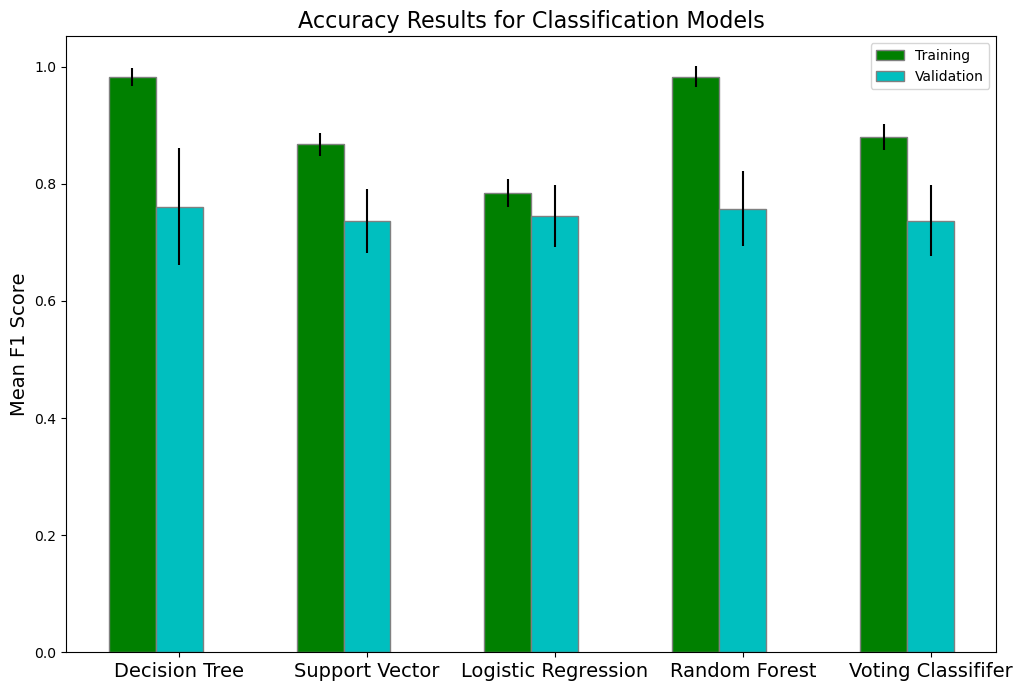

In [235]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
training = [0.982, 0.867, 0.784, 0.983, 0.88]
validation = [0.761, 0.736, 0.745, 0.757, 0.737]
t_error = [0.0157, 0.0198, 0.0243, 0.0186, 0.0223]
v_error = [0.0991, 0.0544, 0.0524, 0.0642, 0.06]

# Set position of bar on X axis
br1 = np.arange(len(training))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, training, yerr = t_error, color ='g', width = barWidth,
        edgecolor ='grey', label ='Training')
plt.bar(br2, validation, yerr = v_error, color ='c', width = barWidth,
        edgecolor ='grey', label ='Validation')
 
# Adding Xticks
# plt.xlabel('Classification model', fontweight ='bold', fontsize = 14)
plt.ylabel('Mean F1 Score', fontsize = 14)
plt.xticks([r + barWidth for r in range(len(training))],
        ['Decision Tree', 'Support Vector', 'Logistic Regression', 'Random Forest', 'Voting Classififer'], fontsize = 14)
 
plt.legend()
plt.title('Accuracy Results for Classification Models',fontsize = 16)
plt.savefig('1.png')
plt.show()

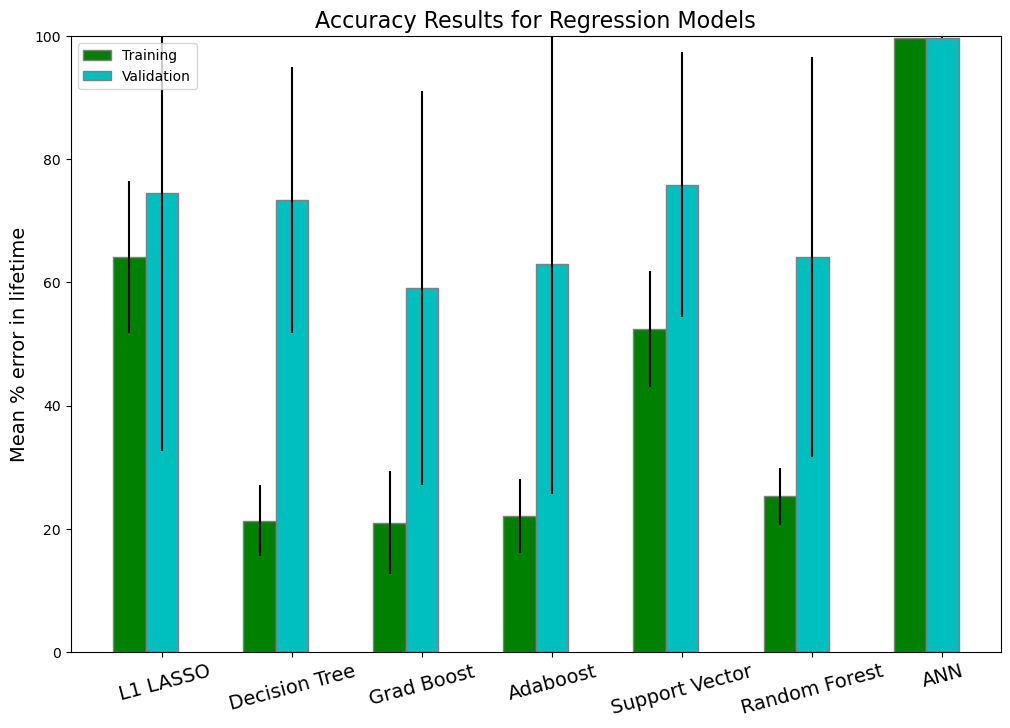

In [238]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
training = [64.169, 21.301, 20.975, 22.103, 52.407, 25.26, 99.713]
validation = [74.531, 73.415, 59.103, 63.03, 75.87, 64.154, 99.749]
t_error = [12.3399, 5.7639, 8.3715, 5.9497, 9.46, 4.6401, 0.0176]
v_error = [41.9188, 21.5766, 31.9192, 37.4022, 21.4563, 32.5178, 0.0468]

# Set position of bar on X axis
br1 = np.arange(len(training))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, training, yerr = t_error, color ='g', width = barWidth,
        edgecolor ='grey', label ='Training')
plt.bar(br2, validation, yerr = v_error, color ='c', width = barWidth,
        edgecolor ='grey', label ='Validation')
 
# Adding Xticks
# plt.xlabel('Classification model', fontweight ='bold', fontsize = 14)
plt.ylabel('Mean % error in lifetime', fontsize = 14)
plt.xticks([r + barWidth for r in range(len(training))],
        [' L1 LASSO', 'Decision Tree', 'Grad Boost', 'Adaboost', 'Support Vector', 'Random Forest', 'ANN'], fontsize = 14)
 
plt.ylim(0,100)
plt.xticks(rotation = 15)
plt.legend()
plt.title('Accuracy Results for Regression Models',fontsize = 16)
plt.savefig('2.png')
plt.show()